In [264]:
import os

cache_dir = '/mnt/data/fastf1_cache'
os.makedirs(cache_dir, exist_ok=True)  # creates directory if it doesn't exist

fastf1.Cache.enable_cache(cache_dir)


In [266]:
import fastf1
import pandas as pd
from fastf1 import utils
from datetime import timedelta

fastf1.Cache.enable_cache('/mnt/data/fastf1_cache')  # Set your cache directory

def load_session_data(year, gp_name, session_type):
    session = fastf1.get_session(year, gp_name, session_type)
    session.load()
    laps = session.laps
    weather = session.weather_data

    # Convert time columns to datetime for merging
    session_start = session.session_start_time
    laps['Time'] = session_start + laps['Time']
    weather['Time'] = session_start + weather['Time']

    # Merge laps and weather on nearest time (forward/backward)
    merged = pd.merge_asof(
        laps.sort_values('Time'),
        weather.sort_values('Time'),
        on='Time',
        direction='nearest'
    )
    merged['Year'] = year
    merged['SessionType'] = session_type
    merged['GP'] = gp_name
    return merged

In [268]:

# Spanish GPs 2021-2024
spanish_gp_years = [2021, 2022, 2023, 2024]
spanish_data = pd.DataFrame()
for year in spanish_gp_years:
    for session_type in ['Q', 'R']:  # Qualifying and Race
        merged = load_session_data(year, 'Spanish Grand Prix', session_type)
        spanish_data = pd.concat([spanish_data, merged], ignore_index=True)

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', '6', '9']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data

In [270]:
spanish_data.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Year,SessionType,GP
0,0 days 00:51:53.817000,LAT,6,NaT,1.0,1.0,0 days 00:25:02.836000,NaT,NaT,0 days 00:00:41.527000,...,25.2,47.7,1002.5,False,44.2,216,0.4,2021,Q,Spanish Grand Prix
1,0 days 00:51:57.213000,MSC,47,NaT,1.0,1.0,0 days 00:25:04.641000,NaT,NaT,0 days 00:00:42.067000,...,25.2,47.7,1002.5,False,44.2,216,0.4,2021,Q,Spanish Grand Prix
2,0 days 00:52:01.024000,MAZ,9,NaT,1.0,1.0,0 days 00:25:06.505000,NaT,NaT,0 days 00:00:44.967000,...,25.2,47.1,1002.4,False,44.9,198,0.5,2021,Q,Spanish Grand Prix
3,0 days 00:52:10.471000,RUS,63,NaT,1.0,1.0,0 days 00:25:10.760000,NaT,NaT,0 days 00:00:44.786000,...,25.2,47.1,1002.4,False,44.9,198,0.5,2021,Q,Spanish Grand Prix
4,0 days 00:53:14.058000,LAT,6,0 days 00:01:20.241000,2.0,1.0,NaT,NaT,0 days 00:00:22.380000,0 days 00:00:30.049000,...,25.2,48.1,1002.4,False,45.1,193,0.3,2021,Q,Spanish Grand Prix


In [272]:

# 2025 completed races (update if new races finish)
races_2025 = [
    'Bahrain Grand Prix',
    'Saudi Arabian Grand Prix',
    'Australian Grand Prix',
    'Japanese Grand Prix',
    'Chinese Grand Prix',
    'Miami Grand Prix',
    'Emilia Romagna Grand Prix',
    'Monaco Grand Prix'
]

season_2025_data = pd.DataFrame()
for race in races_2025:
    for session_type in ['Q', 'R']:
        try:
            merged_2025 = load_session_data(2025, race, session_type)
            season_2025_data = pd.concat([season_2025_data, merged_2025], ignore_index=True)
        except Exception as e:
            print(f"Warning: Skipping {race} {session_type} due to {e}")


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '16', '12', '10', '4', '1', '55', '44', '22', '7', '6', '14', '31', '23', '27', '30', '5', '18', '87']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached dat

In [273]:
season_2025_data.info()

<class 'fastf1.core.Laps'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                11211 non-null  timedelta64[ns]
 1   Driver              11211 non-null  object         
 2   DriverNumber        11211 non-null  object         
 3   LapTime             10256 non-null  timedelta64[ns]
 4   LapNumber           11211 non-null  float64        
 5   Stint               10765 non-null  float64        
 6   PitOutTime          1085 non-null   timedelta64[ns]
 7   PitInTime           1077 non-null   timedelta64[ns]
 8   Sector1Time         10437 non-null  timedelta64[ns]
 9   Sector2Time         11134 non-null  timedelta64[ns]
 10  Sector3Time         10931 non-null  timedelta64[ns]
 11  Sector1SessionTime  10409 non-null  timedelta64[ns]
 12  Sector2SessionTime  11134 non-null  timedelta64[ns]
 13  Sector3SessionTime  10931 non-null  timede

In [282]:
# Filter Spanish GP data to only drivers racing in 2025 season
drivers_2025 = season_2025_data['Driver'].unique()
spanish_data = spanish_data[spanish_data['Driver'].isin(drivers_2025)]


In [284]:
# Combine all data
combined_data = pd.concat([spanish_data, season_2025_data], ignore_index=True)
combined_data.head()
combined_data['DriverNumber']= combined_data['DriverNumber'].astype(int)

In [286]:
combined_data.to_csv('/mnt/data/f1_consolidated_race_qualifying_data_2021_2025.csv', index=False)
combined_data.shape

(15201, 41)

In [288]:
combined_data = combined_data.dropna(subset=['LapTime'])

# Then convert
combined_data['LapTimeSeconds'] = combined_data['LapTime'].dt.total_seconds()

# Driver Performance Metrics
driver_performance = combined_data.groupby(['Driver', 'Year']).agg({
    'LapTimeSeconds': ['mean', 'std'],
    'Position': 'min',  # best position
    'TyreLife': 'mean'
}).reset_index()

driver_performance.columns = ['Driver', 'Year', 'AvgLapTime', 'LapTimeStdDev', 'BestPosition', 'AvgTyreLife']

# Car Performance Indicators
car_performance = combined_data.groupby(['Driver', 'Year']).agg({
    'SpeedI1': 'mean',
    'SpeedI2': 'mean',
    'SpeedFL': 'mean',
    'SpeedST': 'mean'
}).reset_index()

car_performance.columns = ['Driver', 'Year', 'MeanSpeedI1', 'MeanSpeedI2', 'MeanSpeedFL', 'MeanSpeedST']

# Environmental Factors
env_factors = combined_data.groupby(['Driver', 'Year']).agg({
    'TrackTemp': 'mean',
    'AirTemp': 'mean',
    'Humidity': 'mean',
    'WindSpeed': 'mean'
}).reset_index()

env_factors.columns = ['Driver', 'Year', 'AvgTrackTemp', 'AvgAirTemp', 'AvgHumidity', 'AvgWindSpeed']

# Merge all features
merged_features = driver_performance.merge(car_performance, on=['Driver', 'Year'])
merged_features = merged_features.merge(env_factors, on=['Driver', 'Year'])


C:\Users\SHREEANSH\AppData\Local\Temp\ipykernel_29720\2589042606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['LapTimeSeconds'] = combined_data['LapTime'].dt.total_seconds()


In [291]:
# Replace all NaNs in numeric columns with column mean
import numpy as np
numeric_cols = merged_features.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    merged_features[col] = merged_features[col].fillna(merged_features[col].mean())


In [293]:
merged_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Driver         72 non-null     object 
 1   Year           72 non-null     int64  
 2   AvgLapTime     72 non-null     float64
 3   LapTimeStdDev  72 non-null     float64
 4   BestPosition   72 non-null     float64
 5   AvgTyreLife    72 non-null     float64
 6   MeanSpeedI1    72 non-null     float64
 7   MeanSpeedI2    72 non-null     float64
 8   MeanSpeedFL    72 non-null     float64
 9   MeanSpeedST    72 non-null     float64
 10  AvgTrackTemp   72 non-null     float64
 11  AvgAirTemp     72 non-null     float64
 12  AvgHumidity    72 non-null     float64
 13  AvgWindSpeed   72 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 8.0+ KB


In [295]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Copy the original to preserve it
df = combined_data.copy()

# ✅ Step 1: Drop redundant or non-informative columns
redundant_cols = [
    'Time', 'LapTime', 'PitOutTime', 'PitInTime', 'LapStartTime',
    'Sector1Time', 'Sector2Time', 'Sector3Time',
    'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
    'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate'
]
df.drop(columns=redundant_cols, inplace=True)

# ✅ Step 2: Encode categorical features
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store for inverse_transform if needed

# ✅ Step 3: Fill NaNs in numeric columns with mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# ✅ Step 4: Final check
print("✅ Final shape:", df.shape)
print("✅ Any NaNs left?", df.isna().sum().sum())


✅ Final shape: (13960, 27)
✅ Any NaNs left? 0


In [297]:
df.drop(columns=['LapStartDate'], inplace=True)

In [299]:
df.head()

,Driver,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,...,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Year,SessionType,GP,LapTimeSeconds
1,16,63,2.0,1.0,273.0,285.0,273.559453,309.0,0,3,...,48.1,1002.4,0,45.1,193,0.3,2021,0,8,95.607
6,9,44,2.0,1.0,287.0,305.0,284.000000,313.0,1,2,...,47.7,1002.6,0,44.9,210,0.4,2021,0,8,78.245
8,20,33,2.0,1.0,286.0,305.0,285.000000,311.0,1,3,...,47.7,1002.6,0,44.9,210,0.4,2021,0,8,78.090
10,18,18,2.0,1.0,286.0,295.0,285.000000,315.0,1,3,...,47.6,1002.5,0,44.4,161,0.5,2021,0,8,79.077
11,19,22,2.0,1.0,286.0,304.0,281.000000,310.0,1,3,...,47.6,1002.5,0,44.4,161,0.5,2021,0,8,78.648


In [301]:
# Split the dataset based on SessionType
qualifying_df = df[df['SessionType'] == 0].copy()
race_df = df[df['SessionType'] == 1].copy()

# Drop the SessionType column if it's no longer needed in the model
qualifying_df.drop(columns=['SessionType'], inplace=True)
race_df.drop(columns=['SessionType'], inplace=True)


In [303]:
qualifying_df

,Driver,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Year,GP,LapTimeSeconds
1,16,63,2.0,1.0,273.0,285.0,273.559453,309.0,0,3,...,25.2,48.1,1002.4,0,45.1,193,0.3,2021,8,95.607
6,9,44,2.0,1.0,287.0,305.0,284.000000,313.0,1,2,...,25.2,47.7,1002.6,0,44.9,210,0.4,2021,8,78.245
8,20,33,2.0,1.0,286.0,305.0,285.000000,311.0,1,3,...,25.2,47.7,1002.6,0,44.9,210,0.4,2021,8,78.090
10,18,18,2.0,1.0,286.0,295.0,285.000000,315.0,1,3,...,25.3,47.6,1002.5,0,44.4,161,0.5,2021,8,79.077
11,19,22,2.0,1.0,286.0,304.0,281.000000,310.0,1,3,...,25.3,47.6,1002.5,0,44.4,161,0.5,2021,8,78.648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13761,20,1,20.0,6.0,225.0,209.0,269.000000,280.0,0,3,...,20.8,63.0,1014.8,0,37.5,0,0.5,2025,6,70.718
13762,15,81,28.0,6.0,224.0,215.0,271.000000,279.0,1,3,...,20.8,63.0,1014.8,0,37.5,0,0.5,2025,6,70.129
13763,13,4,26.0,6.0,225.0,215.0,271.000000,279.0,1,3,...,20.8,63.0,1014.8,0,37.5,0,0.5,2025,6,69.954
13764,1,14,29.0,6.0,222.0,203.0,270.000000,279.0,1,3,...,20.8,63.0,1014.8,0,37.5,0,0.5,2025,6,70.924


In [305]:
!pip install xgboost

In [307]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Split again if needed
X = qualifying_df.drop(columns=['LapTimeSeconds'])
y = qualifying_df['LapTimeSeconds']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines
pipelines = {
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
    'RandomForest': Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'GradientBoosting': Pipeline([
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
}

# Param grids
param_grids = {
    'Ridge': {
        'model__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, None]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    }
}

# Model training
best_models = {}
results = {}

for name in pipelines:
    print(f"\n🔍 Training {name}")
    grid = GridSearchCV(pipelines[name], param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_
    preds = grid.predict(X_test)

    results[name] = {
        'R2': r2_score(y_test, preds),
        'MSE': mean_squared_error(y_test, preds),
        'BestParams': grid.best_params_
    }

# Results
print("\n📊 Model Performance Summary:")
for name, metrics in results.items():
    print(f"{name}: R2 = {metrics['R2']:.4f}, MSE = {metrics['MSE']:.2f}, BestParams = {metrics['BestParams']}")



🔍 Training Ridge

🔍 Training RandomForest

🔍 Training GradientBoosting

🔍 Training XGBoost

📊 Model Performance Summary:
Ridge: R2 = 0.7451, MSE = 88.41, BestParams = {'model__alpha': 1.0}
RandomForest: R2 = 0.8693, MSE = 45.34, BestParams = {'model__max_depth': None, 'model__n_estimators': 200}
GradientBoosting: R2 = 0.8556, MSE = 50.06, BestParams = {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200}
XGBoost: R2 = 0.8626, MSE = 47.66, BestParams = {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 200}


Top model: RandomForest


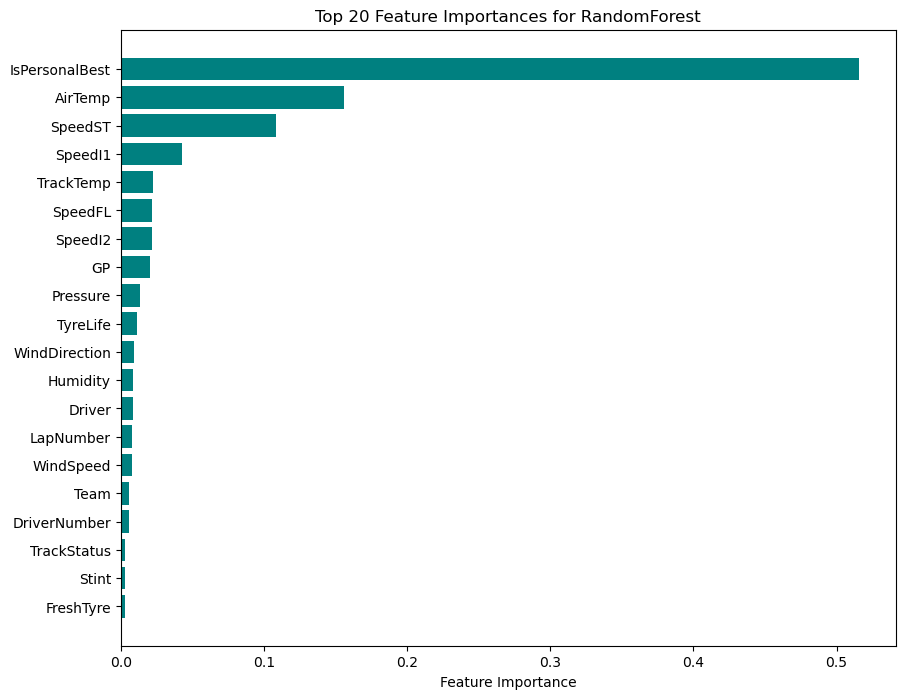

In [182]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Identify top model by highest R2 score
top_model_name = max(results, key=lambda k: results[k]['R2'])
print(f"Top model: {top_model_name}")

top_model = best_models[top_model_name]

# For pipeline, extract the model step
if hasattr(top_model, 'named_steps'):
    model = top_model.named_steps['model']
else:
    model = top_model

# Get feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    print("Model does not have feature_importances_ attribute.")
    importances = None

if importances is not None:
    feature_names = X_train.columns
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(20)  # top 20 features

    plt.figure(figsize=(10, 8))
    plt.barh(feat_imp_df['Feature'][::-1], feat_imp_df['Importance'][::-1], color='teal')
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importances for {top_model_name}')
    plt.show()


In [189]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Split again if needed
X = race_df.drop(columns=['LapTimeSeconds'])
y = race_df['LapTimeSeconds']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipelines
pipelines = {
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
    'RandomForest': Pipeline([
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'GradientBoosting': Pipeline([
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
}

# Param grids
param_grids = {
    'Ridge': {
        'model__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [5, 10, None]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    }
}

# Model training
best_models = {}
results = {}

for name in pipelines:
    print(f"\n🔍 Training {name}")
    grid = GridSearchCV(pipelines[name], param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_
    preds = grid.predict(X_test)

    results[name] = {
        'R2': r2_score(y_test, preds),
        'MSE': mean_squared_error(y_test, preds),
        'BestParams': grid.best_params_
    }

# Results
print("\n📊 Model Performance Summary:")
for name, metrics in results.items():
    print(f"{name}: R2 = {metrics['R2']:.4f}, MSE = {metrics['MSE']:.2f}, BestParams = {metrics['BestParams']}")



🔍 Training Ridge

🔍 Training RandomForest

🔍 Training GradientBoosting

🔍 Training XGBoost

📊 Model Performance Summary:
Ridge: R2 = 0.8419, MSE = 22.03, BestParams = {'model__alpha': 0.1}
RandomForest: R2 = 0.9707, MSE = 4.08, BestParams = {'model__max_depth': None, 'model__n_estimators': 200}
GradientBoosting: R2 = 0.9743, MSE = 3.57, BestParams = {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
XGBoost: R2 = 0.9751, MSE = 3.46, BestParams = {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}


Top model: RandomForest


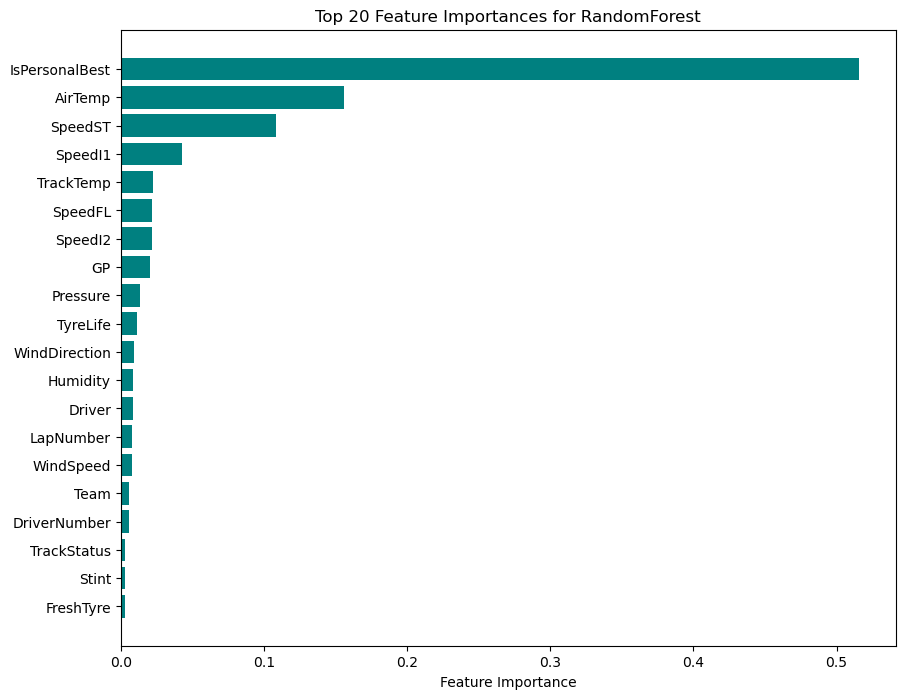

In [309]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Identify top model by highest R2 score
top_model_name = max(results, key=lambda k: results[k]['R2'])
print(f"Top model: {top_model_name}")

top_model = best_models[top_model_name]

# For pipeline, extract the model step
if hasattr(top_model, 'named_steps'):
    model = top_model.named_steps['model']
else:
    model = top_model

# Get feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    print("Model does not have feature_importances_ attribute.")
    importances = None

if importances is not None:
    feature_names = X_train.columns
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(20)  # top 20 features

    plt.figure(figsize=(10, 8))
    plt.barh(feat_imp_df['Feature'][::-1], feat_imp_df['Importance'][::-1], color='teal')
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importances for {top_model_name}')
    plt.show()


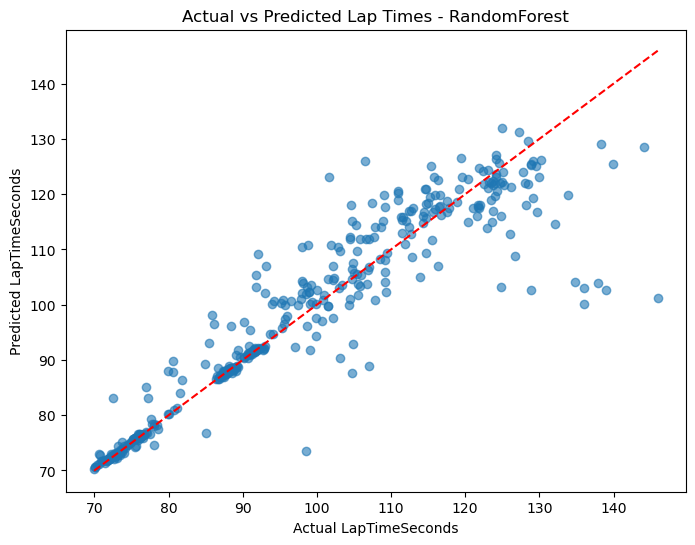

In [313]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = top_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual LapTimeSeconds')
plt.ylabel('Predicted LapTimeSeconds')
plt.title(f'Actual vs Predicted Lap Times - {top_model_name}')
plt.show()


In [316]:
qualifying_df.info()

<class 'fastf1.core.Laps'>
Index: 2126 entries, 1 to 13765
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Driver          2126 non-null   int32  
 1   DriverNumber    2126 non-null   int32  
 2   LapNumber       2126 non-null   float64
 3   Stint           2126 non-null   float64
 4   SpeedI1         2126 non-null   float64
 5   SpeedI2         2126 non-null   float64
 6   SpeedFL         2126 non-null   float64
 7   SpeedST         2126 non-null   float64
 8   IsPersonalBest  2126 non-null   int32  
 9   Compound        2126 non-null   int32  
 10  TyreLife        2126 non-null   float64
 11  FreshTyre       2126 non-null   int32  
 12  Team            2126 non-null   int32  
 13  TrackStatus     2126 non-null   int32  
 14  Position        2126 non-null   float64
 15  AirTemp         2126 non-null   float64
 16  Humidity        2126 non-null   float64
 17  Pressure        2126 non-null   float64
 18  Rai

In [318]:
qualifying_df


,Driver,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,...,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Year,GP,LapTimeSeconds
1,16,63,2.0,1.0,273.0,285.0,273.559453,309.0,0,3,...,25.2,48.1,1002.4,0,45.1,193,0.3,2021,8,95.607
6,9,44,2.0,1.0,287.0,305.0,284.000000,313.0,1,2,...,25.2,47.7,1002.6,0,44.9,210,0.4,2021,8,78.245
8,20,33,2.0,1.0,286.0,305.0,285.000000,311.0,1,3,...,25.2,47.7,1002.6,0,44.9,210,0.4,2021,8,78.090
10,18,18,2.0,1.0,286.0,295.0,285.000000,315.0,1,3,...,25.3,47.6,1002.5,0,44.4,161,0.5,2021,8,79.077
11,19,22,2.0,1.0,286.0,304.0,281.000000,310.0,1,3,...,25.3,47.6,1002.5,0,44.4,161,0.5,2021,8,78.648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13761,20,1,20.0,6.0,225.0,209.0,269.000000,280.0,0,3,...,20.8,63.0,1014.8,0,37.5,0,0.5,2025,6,70.718
13762,15,81,28.0,6.0,224.0,215.0,271.000000,279.0,1,3,...,20.8,63.0,1014.8,0,37.5,0,0.5,2025,6,70.129
13763,13,4,26.0,6.0,225.0,215.0,271.000000,279.0,1,3,...,20.8,63.0,1014.8,0,37.5,0,0.5,2025,6,69.954
13764,1,14,29.0,6.0,222.0,203.0,270.000000,279.0,1,3,...,20.8,63.0,1014.8,0,37.5,0,0.5,2025,6,70.924


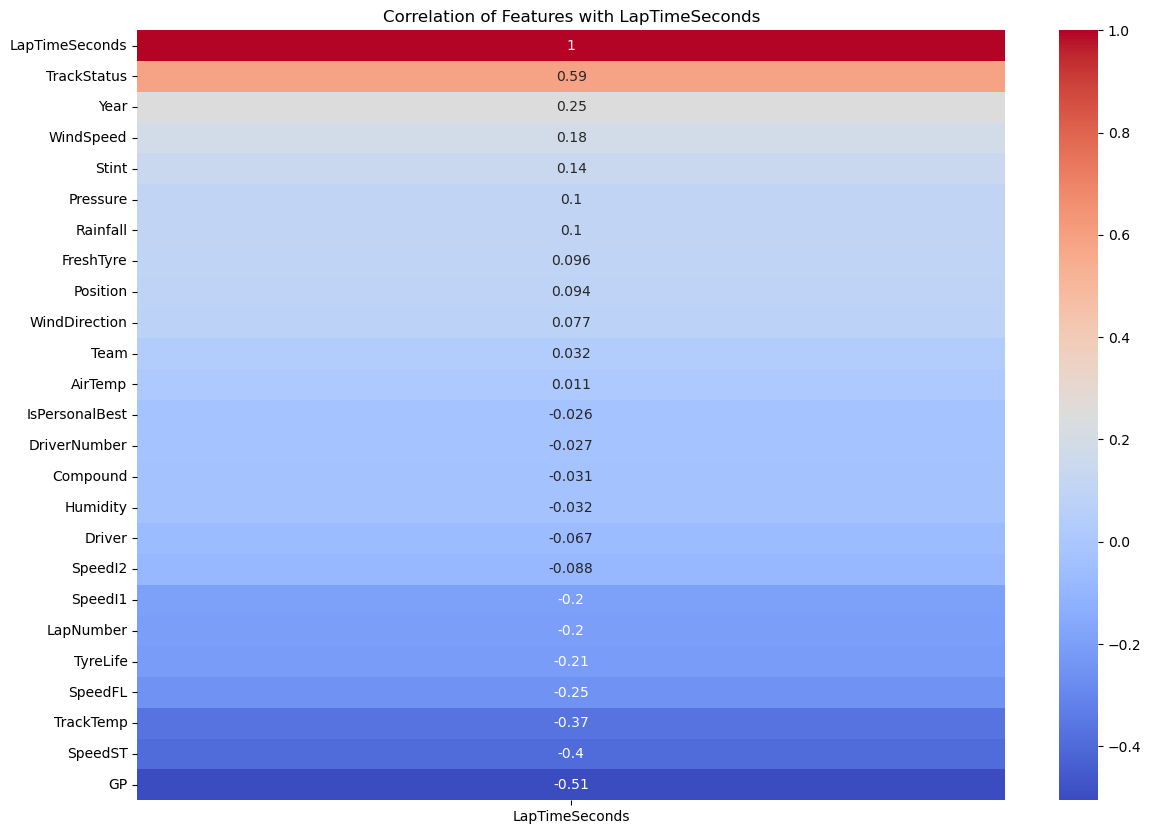

In [328]:
race_df
plt.figure(figsize=(14, 10))
corr = race_df.corr(numeric_only=True)
sns.heatmap(corr[['LapTimeSeconds']].sort_values(by='LapTimeSeconds', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with LapTimeSeconds')
plt.show()

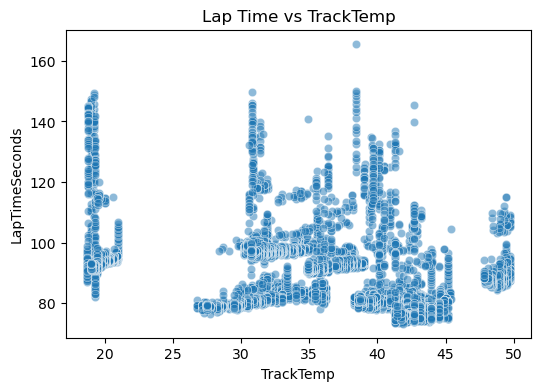

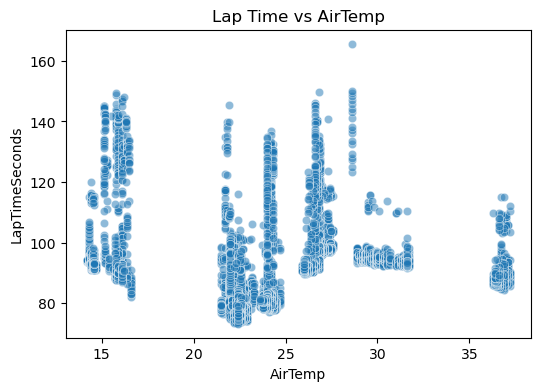

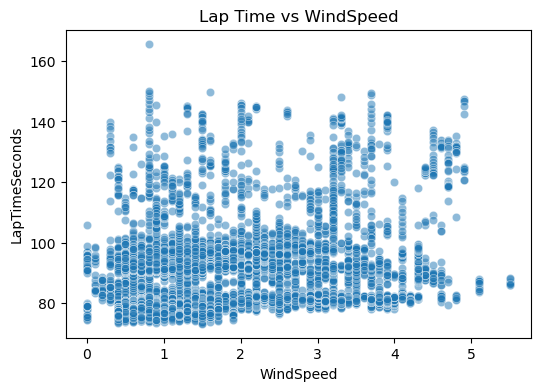

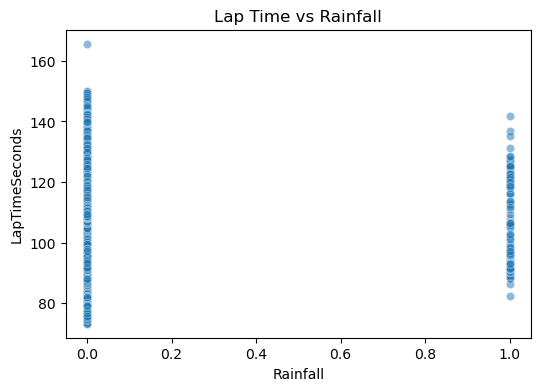

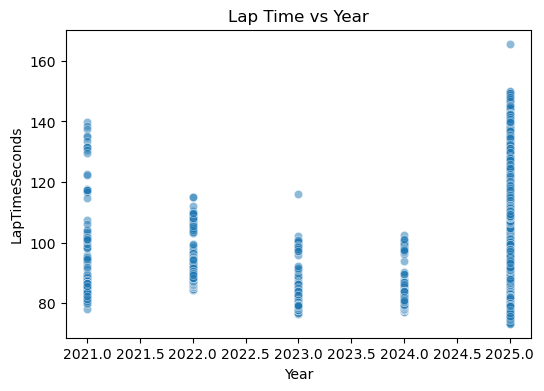

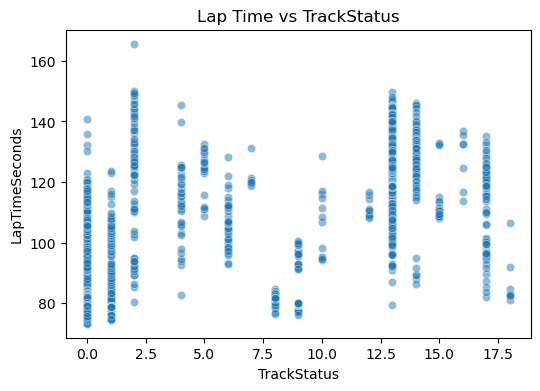

In [334]:
features_to_plot = ['TrackTemp', 'AirTemp', 'WindSpeed', 'Rainfall', 'Year', 'TrackStatus']
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=race_df, x=feature, y='LapTimeSeconds', alpha=0.5)
    plt.title(f'Lap Time vs {feature}')
    plt.show()


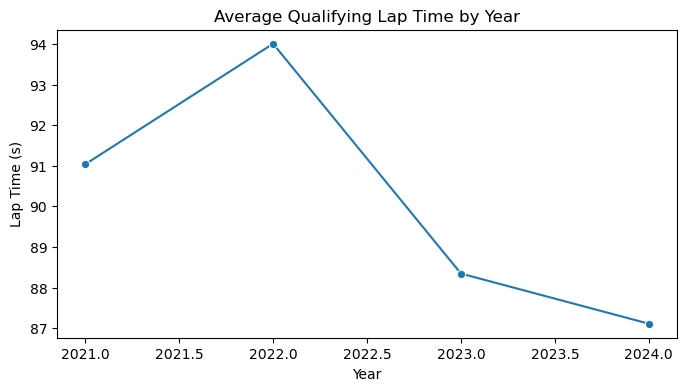

,Year,GP,LapTimeSeconds
0,2021,8,91.036263
1,2022,8,94.005273
2,2023,8,88.345132
3,2024,8,87.110000


In [369]:
avg_lap_time_year = qualifying_df[qualifying_df['Year'] != 2025].groupby(['Year', 'GP'])['LapTimeSeconds'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_lap_time_year, x='Year', y='LapTimeSeconds', marker='o')
plt.title('Average Qualifying Lap Time by Year')
plt.ylabel('Lap Time (s)')
plt.show()
avg_lap_time_year.head()

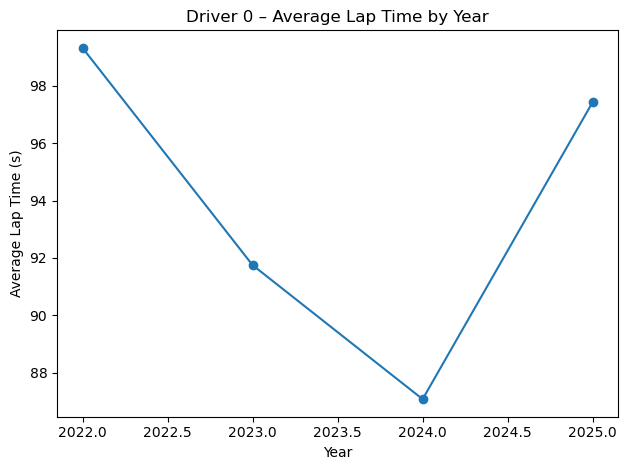

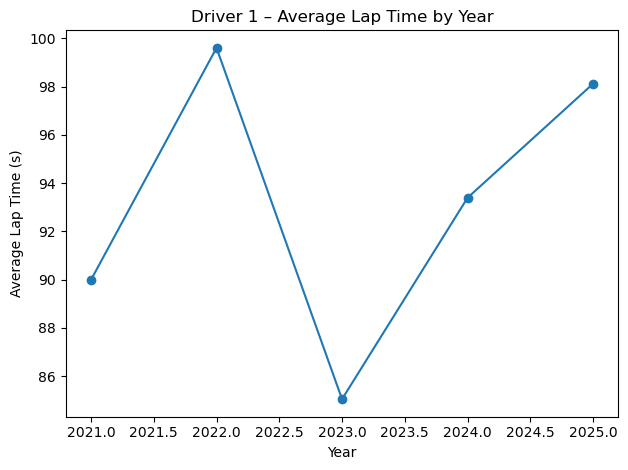

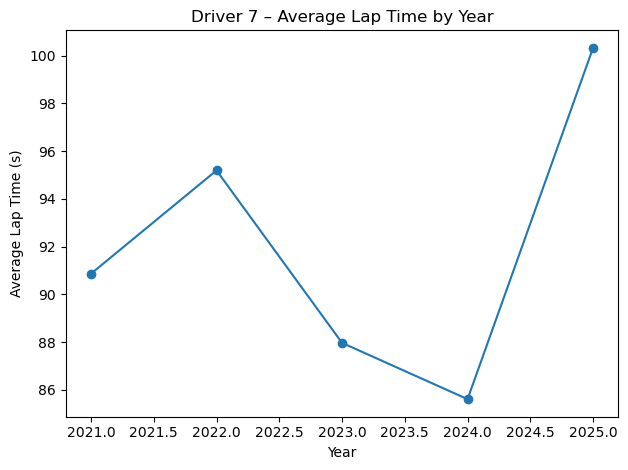

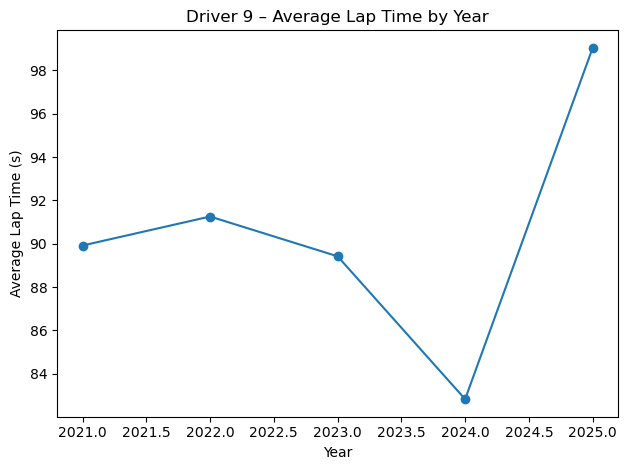

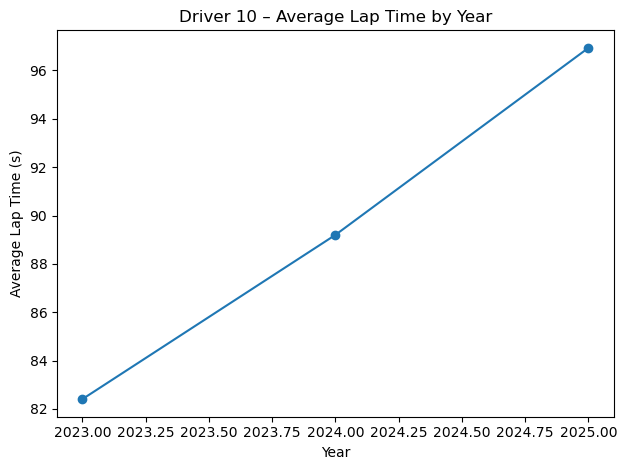

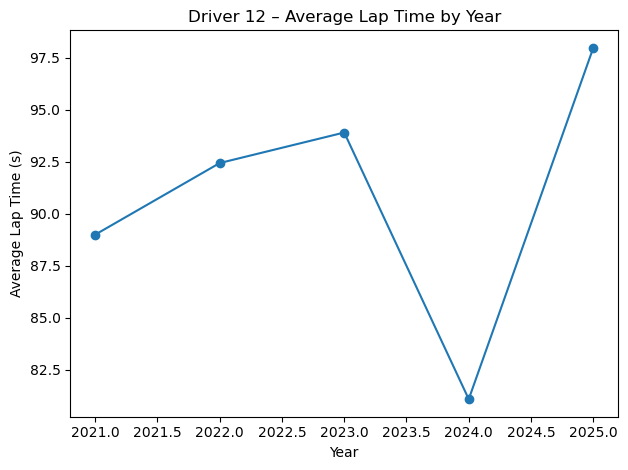

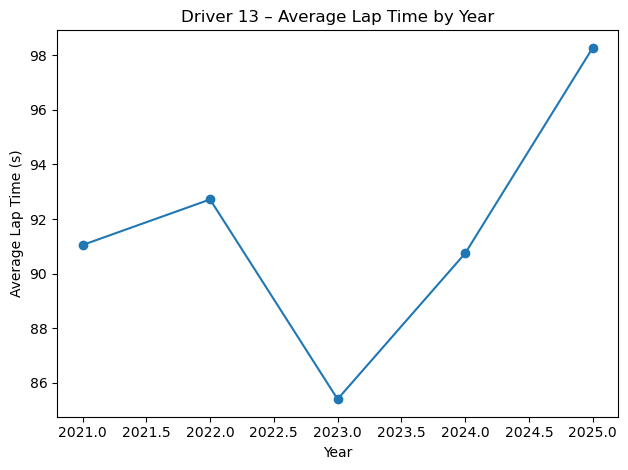

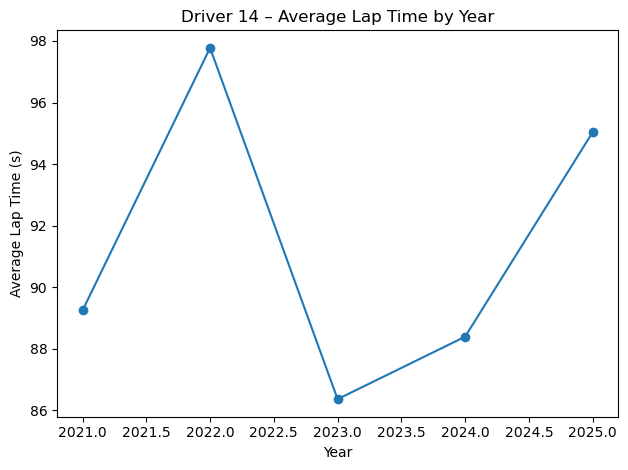

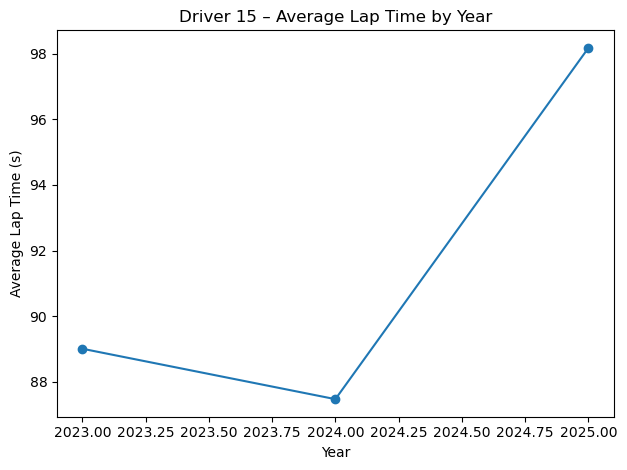

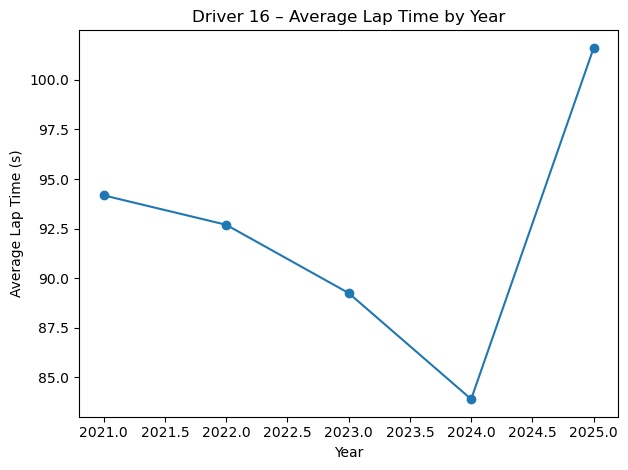

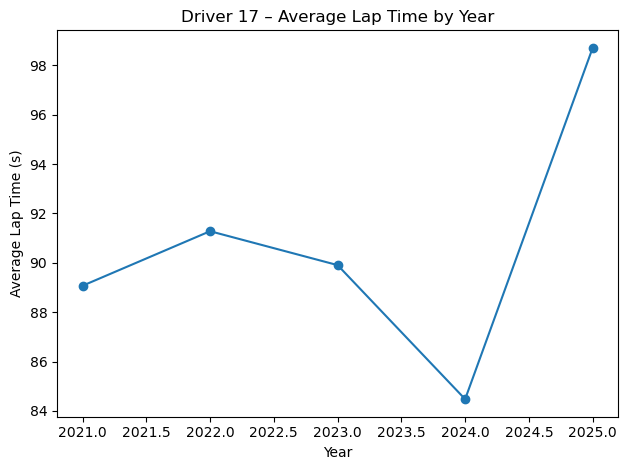

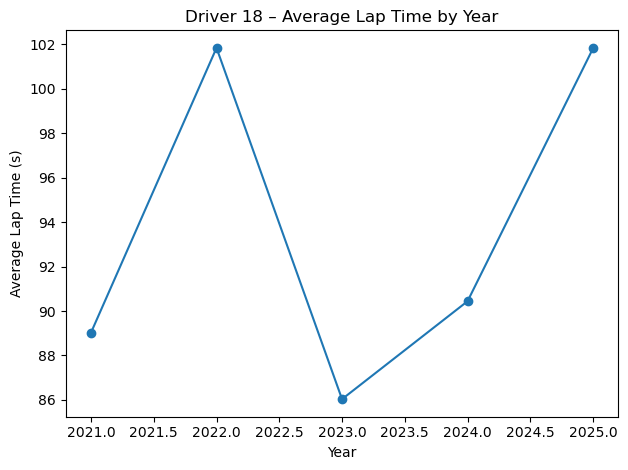

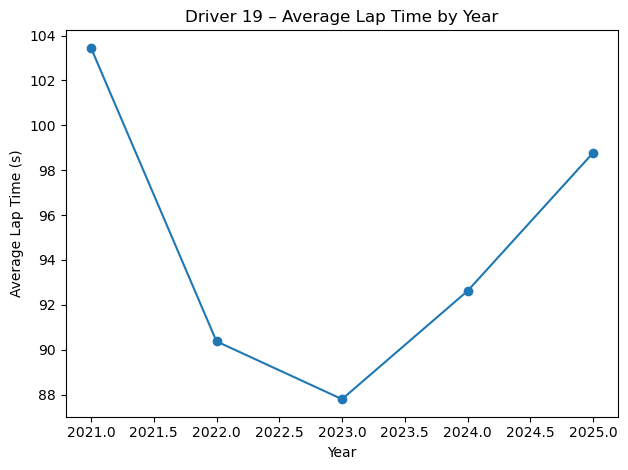

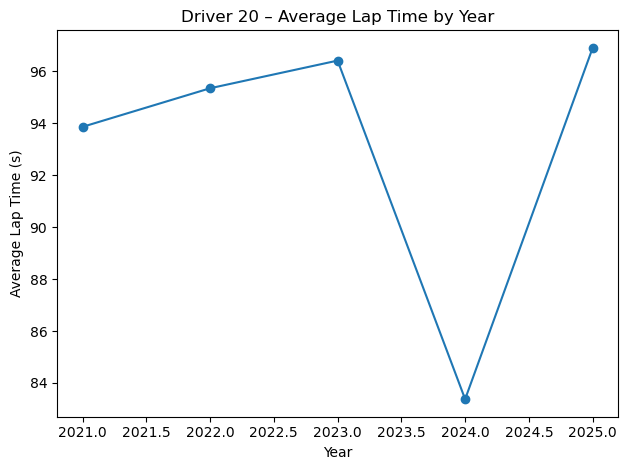

In [397]:
import matplotlib.pyplot as plt

# Make sure qualifying_df is loaded
# e.g. qualifying_df = pd.read_csv('your_qualifying_df.csv')

# Get list of all drivers
driver_ids = sorted(qualifying_df['Driver'].unique())
a = [2,3,4,5,6,8,11]
for i in a:
    driver_ids.remove(i)
for driver_id in driver_ids:
    # Filter for this driver
    df_d = qualifying_df[qualifying_df['Driver'] == driver_id]
    
    # Compute mean lap time per year
    avg_by_year = (
        df_d
        .groupby('Year')['LapTimeSeconds']
        .mean()
        .reset_index()
    )
    
    
    # Plot trend
    plt.figure()
    plt.plot(avg_by_year['Year'], avg_by_year['LapTimeSeconds'], marker='o')
    plt.title(f'Driver {driver_id} – Average Lap Time by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Lap Time (s)')
    plt.tight_layout()
    plt.show()


In [401]:
drivers = [
    {'Driver': 0,  'DriverNumber': 23},  # Alexander Albon
    {'Driver': 1,  'DriverNumber': 14},  # Fernando Alonso
    {'Driver': 2,  'DriverNumber': 12},  # Kimi An
    {'Driver': 3,  'DriverNumber': 87},  # Nyck de Vries / test/reserve
    {'Driver': 4,  'DriverNumber': 5},   # Sebastian Vettel (historical)
    {'Driver': 5,  'DriverNumber': 43},  # Unknown/test/reserve
    {'Driver': 6,  'DriverNumber': 7},   # Kimi Räikkönen (2021)
    {'Driver': 7,  'DriverNumber': 10},  # Pierre Gasly
    {'Driver': 8,  'DriverNumber': 6},   # Nicholas Latifi (2021–2022)
    {'Driver': 9,  'DriverNumber': 44},  # Lewis Hamilton
    {'Driver': 10, 'DriverNumber': 27},  # Nico Hülkenberg
    {'Driver': 11, 'DriverNumber': 30},  # Unknown / reserve
    {'Driver': 12, 'DriverNumber': 16},  # Charles Leclerc
    {'Driver': 13, 'DriverNumber': 4},   # Lando Norris
    {'Driver': 14, 'DriverNumber': 31},  # Esteban Ocon
    {'Driver': 15, 'DriverNumber': 81},  # Oscar Piastri
    {'Driver': 16, 'DriverNumber': 63},  # George Russell
    {'Driver': 17, 'DriverNumber': 55},  # Carlos Sainz
    {'Driver': 18, 'DriverNumber': 18},  # Lance Stroll
    {'Driver': 19, 'DriverNumber': 22},  # Yuki Tsunoda
    {'Driver': 20, 'DriverNumber': 1},   # Max Verstappen (current)
    {'Driver': 20, 'DriverNumber': 33},  # Max Verstappen (historic)
]


In [403]:
race_df.to_csv('race_df.csv', index=False)


In [405]:
import os
os.getcwd()  # This shows the current directory


'C:\\Users\\SHREEANSH'

In [407]:
base_features = {
    'LapNumber': 1.0,
    'Stint': 1.0,
    'IsPersonalBest': 1,
    'Compound': 1,
    'TyreLife': 0.0,
    'FreshTyre': 1,
    'TrackStatus': 1,
    'AirTemp': 29.0,
    'Humidity': 60.0,
    'Pressure': 1013.0,
    'Rainfall': 0,
    'TrackTemp': 45.0,
    'WindDirection': 0,
    'WindSpeed': 3.1,
    'Year': 2025,
    'GP': 8
}


In [409]:
drivers_features = [
    {'Driver': 0, 'DriverNumber': 23, 'SpeedI1': 261.06, 'SpeedI2': 264.15, 'SpeedFL': 275.83, 'SpeedST': 301.14},
    {'Driver': 1, 'DriverNumber': 14, 'SpeedI1': 265.74, 'SpeedI2': 272.02, 'SpeedFL': 278.49, 'SpeedST': 305.50},
    {'Driver': 7, 'DriverNumber': 10, 'SpeedI1': 262.08, 'SpeedI2': 265.05, 'SpeedFL': 277.88, 'SpeedST': 301.09},
    {'Driver': 9, 'DriverNumber': 44, 'SpeedI1': 270.21, 'SpeedI2': 273.20, 'SpeedFL': 280.61, 'SpeedST': 309.83},
    {'Driver': 10, 'DriverNumber': 27, 'SpeedI1': 267.66, 'SpeedI2': 277.02, 'SpeedFL': 279.65, 'SpeedST': 304.64},
    {'Driver': 12, 'DriverNumber': 16, 'SpeedI1': 267.65, 'SpeedI2': 278.23, 'SpeedFL': 281.59, 'SpeedST': 307.57},
    {'Driver': 13, 'DriverNumber': 4,  'SpeedI1': 260.44, 'SpeedI2': 270.65, 'SpeedFL': 280.77, 'SpeedST': 308.66},
    {'Driver': 14, 'DriverNumber': 31, 'SpeedI1': 264.09, 'SpeedI2': 269.77, 'SpeedFL': 276.90, 'SpeedST': 299.63},
    {'Driver': 15, 'DriverNumber': 81, 'SpeedI1': 265.74, 'SpeedI2': 274.55, 'SpeedFL': 278.29, 'SpeedST': 302.84},
    {'Driver': 16, 'DriverNumber': 63, 'SpeedI1': 265.92, 'SpeedI2': 275.48, 'SpeedFL': 281.05, 'SpeedST': 303.20},
    {'Driver': 17, 'DriverNumber': 55, 'SpeedI1': 267.20, 'SpeedI2': 278.55, 'SpeedFL': 280.55, 'SpeedST': 304.93},
    {'Driver': 18, 'DriverNumber': 18, 'SpeedI1': 257.22, 'SpeedI2': 262.35, 'SpeedFL': 277.79, 'SpeedST': 302.54},
    {'Driver': 19, 'DriverNumber': 22, 'SpeedI1': 263.82, 'SpeedI2': 271.92, 'SpeedFL': 277.73, 'SpeedST': 305.12},
    {'Driver': 20, 'DriverNumber': 1, 'SpeedI1': 263.75, 'SpeedI2': 272.52, 'SpeedFL': 279.14, 'SpeedST': 299.56},
    {'Driver': 20, 'DriverNumber': 33, 'SpeedI1': 263.75, 'SpeedI2': 272.52, 'SpeedFL': 279.14, 'SpeedST': 299.56},
]


In [411]:
for d in drivers_features:
    d.update({
        'LapNumber': 1.0,
        'Stint': 1.0,
        'IsPersonalBest': 1,
        'Compound': 1,
        'TyreLife': 0.0,
        'FreshTyre': 1,
        'TrackStatus': 1,
        'AirTemp': 29.0,
        'Humidity': 60.0,
        'Pressure': 1013.0,
        'Rainfall': 0,
        'TrackTemp': 45.0,
        'WindDirection': 0,
        'WindSpeed': 3.1,
        'Year': 2025,
        'GP': 8,
        'Team': 0,        # 🔧 Placeholder — ideally, encode using your training data's logic
        'Position': 10.0
    })


In [413]:
import pandas as pd
prediction_df = pd.DataFrame(drivers_features)


In [420]:
prediction_df
prediction_df = prediction_df[X_train.columns].copy()
predictions = top_model.predict(prediction_df)
prediction_df['PredictedLapTime'] = predictions
prediction_df['LapTimeMins'] = prediction_df['PredictedLapTime'] / 60
prediction_df['Minutes'] = prediction_df['LapTimeMins'].astype(int)

# Calculate seconds by taking the decimal part * 60 and rounding
prediction_df['Seconds'] = ((prediction_df['LapTimeMins'] - prediction_df['Minutes']) * 60).round().astype(int)
prediction_df[['DriverNumber', 'LapTimeMins', 'Minutes', 'Seconds']].sort_values(by='LapTimeMins')

,DriverNumber,LapTimeMins,Minutes,Seconds
6,4,1.448452,1,27
8,81,1.450797,1,27
9,63,1.451178,1,27
10,55,1.452359,1,27
5,16,1.453120,1,27
11,18,1.453267,1,27
12,22,1.453318,1,27
1,14,1.453364,1,27
0,23,1.453467,1,27
3,44,1.453673,1,27
